# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import numpy as np
from scipy.stats import pearsonr, spearmanr 
pd.set_option('display.max_columns', None) 
pd.options.display.max_rows = 4000
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from pprint import pprint
from tictoc import tic, toc

# Read Data

## Read all data at once and clean them

In [ ]:
Path = 'D:/TADA/MachineLearningCSV2018'
Path_Cleaned = 'D:/TADA/MachineLearningCSV2018_Cleaned'
All = pd.DataFrame()
i = 0
for f in glob.glob(Path +"\\*.csv"):
    data = pd.read_csv(f, dtype='unicode')
#     print('df Shape:', df.shape)
#     print(df['Label'].value_counts())
    i += 1
#     print(data.shape)
    data = Drop_Duplicates_EncodingLabel(data)
#     print(data.shape)
    data = drop_nonNumericValues(data)
    data.to_csv(Path_Cleaned+'/CleanData'+str(i)+'.csv', index=False)
#     print(data.shape)
    print(100*'*')
#     print(100*'*')

## Read each data file separately 

In [3]:
Path = 'D:/TADA/MachineLearningCSV2018'
Bot = pd.read_csv(Path+'/Friday-02-03-2018_TrafficForML_CICFlowMeter.csv', dtype='unicode')
# # Dos = pd.read_csv(Path+'/Friday-16-02-2018_TrafficForML_CICFlowMeter.csv', dtype='unicode')
# # SQL_Injection1 = pd.read_csv(Path+'/Friday-23-02-2018_TrafficForML_CICFlowMeter.csv', dtype='unicode')
# DDoS = pd.read_csv(Path+'/Thuesday-20-02-2018_TrafficForML_CICFlowMeter.csv', dtype='unicode')
# # Infilteration1 = pd.read_csv(Path+'/Thursday-01-03-2018_TrafficForML_CICFlowMeter.csv', dtype='unicode')
# # Dos2 = pd.read_csv(Path+'/Thursday-15-02-2018_TrafficForML_CICFlowMeter.csv', dtype='unicode')
# # SQL_Injection2 = pd.read_csv(Path+'/Thursday-22-02-2018_TrafficForML_CICFlowMeter.csv', dtype='unicode')
# # BruteForce = pd.read_csv(Path+'/Wednesday-14-02-2018_TrafficForML_CICFlowMeter.csv', dtype='unicode')
# # DDos2 = pd.read_csv(Path+'/Wednesday-21-02-2018_TrafficForML_CICFlowMeter.csv', dtype='unicode')
# # Infilteration2 = pd.read_csv(Path+'/Wednesday-28-02-2018_TrafficForML_CICFlowMeter.csv', dtype='unicode')

# # # Concat Similar Data
# # SQL_Injection = pd.concat([SQL_Injection1, SQL_Injection2])
# # Infilteration = pd.concat([Infilteration1, Infilteration2])

# Data Cleaning

In [3]:
le=LabelEncoder()
def Drop_Duplicates_EncodingLabel(data):
    data.drop('Timestamp', axis=1, inplace=True)
    data.drop_duplicates(inplace=True)
    data['Label']=le.fit_transform(data['Label'])
    return data


def drop_nonNumericValues(data):
    '''Remove non-numeric rows'''
    Infilteration_permanent = pd.DataFrame(columns= data.columns)
    for i in data.columns:
        Infilteration_temp=data[data[i].apply(lambda x: not str(x).replace('.','').replace('-','').isnumeric())]
        Infilteration_permanent = Infilteration_permanent.append(Infilteration_temp)
        Infilteration_permanent.drop_duplicates(inplace=True)
    data_Clean = pd.concat([data, Infilteration_permanent]).drop_duplicates(keep=False)
    data_Clean = data_Clean.apply(pd.to_numeric)
    return data_Clean

In [18]:
Path_Cleaned = 'D:/TADA/MachineLearningCSV2018_Cleaned'
i = 0
for data in [Bot, Dos, SQL_Injection, Infilteration, Dos2, BruteForce, DDos2]:
    i += 1
    print(data.shape)
    data = Drop_Duplicates_EncodingLabel(data)
    print(data.shape)
    data = drop_nonNumericValues(data)
    data.to_csv(Path_Cleaned+'/CleanData_'+str(i)+'.csv', index=False)
    print(data.shape)
    print(100*'*')

(1048575, 80)
(823732, 79)
(682647, 79)
****************************************************************************************************
(1048575, 80)
(591902, 79)
(591901, 79)
****************************************************************************************************
(2097150, 80)
(1764880, 79)
(1754290, 79)
****************************************************************************************************
(944229, 80)
(791170, 79)
(783917, 79)
****************************************************************************************************
(1048575, 80)
(884658, 79)
(876946, 79)
****************************************************************************************************
(1048575, 80)
(674815, 79)
(671136, 79)
****************************************************************************************************
(1048575, 80)
(561405, 79)
(561405, 79)
****************************************************************************************************


In [15]:
#DDoS has different columns so we should clean this data separately

Path_Cleaned = 'D:/TADA/MachineLearningCSV2018_Cleaned'
i = 0
for data in [DDoS]:
    i += 1
    print(data.shape)
    data.drop(['Flow ID','Src IP', 'Dst IP'], axis=1, inplace=True)
    data = Drop_Duplicates_EncodingLabel(data)
    print(data.shape)
    data = drop_nonNumericValues(data)
    data.to_csv(Path_Cleaned+'/CleanData_DDoS.csv', index=False)
    print(data.shape)
    print(100*'*')

(7944778, 83)
(7944778, 80)
(6363390, 80)
****************************************************************************************************


# Plot Spearman Correlation

In [51]:
def correlation(corrtype, Data, title, Datacolumns,threshold):

    df_corr = pd.DataFrame()
    data = Data[Datacolumns].copy()  # Copy the data with the specified columns in a new dataframe
    data = data.replace('nan', np.nan)  # replace all null values with np.nan to make it understandable by python
    data.dropna(inplace=True, axis=0)  # update the dataframe and drop or remove all the null values wich are converted to np.nan. 
                                       # axis=0 means drop all the rows which have missing values. axis=1 means drop the columns which have missing values.
    data = data.apply(pd.to_numeric)  # convert all the values to number
    
    # for each pair of features in the data find the correlation score
    for x in data.columns:
        for y in data.columns:
            corr = corrtype(data[x], data[y])  # For example, pearsonr(data['cellvoltage'], data['Power']) returns two values in an array. 
                                               # For example the output of this function can be(0.9, 0.04), which the first value is the correlation score than the second value is the p-value.
            if corr[1] <= pd.to_numeric(threshold): # save the correlation scores if the p-value is significant (based on the threshold)
                df_corr.loc[x,y] = corr[0]
            else: 
                df_corr.loc[x,y] = np.nan

    print(df_corr.shape)
    df_corr.dropna(how='all', axis= (0,1), inplace=True)
    print(df_corr.shape)
    mask = np.zeros_like(df_corr, dtype=np.bool) # put a mask on the scores that the p-value for them was not sgnificant. In this case, we filter out the scores based the p-value
    mask[np.triu_indices_from(mask)] = True # the original heatmap is an square which is symmetric across its diagonal. We remove the triangle above the diagonal by putting a mask on it.
    sns.set(font_scale=.5) #Scale down all the text in the figure
    g = sns.heatmap(df_corr, mask=mask, xticklabels=True, yticklabels=True, annot=True, fmt='.1f', cmap='RdBu_r', vmin=-1, vmax=1, linewidths=0.1, annot_kws={"size": 2})
    g.set_facecolor('white') # Set background color of the figure
    plt.title(title)
    plt.xticks(fontsize=3)
    plt.yticks(fontsize=3)
    plt.savefig('D:\Github\Intrusion Detection (TADA)\Figures\\'+title+'.png', format='png', dpi=1200, bbox_inches='tight')
#     plt.show()



# Specify all the input features
X = list(Infilteration_Clean_Numeric)
# Specify the output feature, can have more than one output feature here
# Y = list(NewBot)
correlation(spearmanr, Infilteration_Clean_Numeric, 'SpearmanCorrelation(Infilteration)2', X, 0.05)

In [5]:
Path_Cleaned = 'D:/TADA/MachineLearningCSV2018_Cleaned'
Infilteration_Clean= pd.read_csv(Path_Cleaned+'/CleanData_Infilteration.csv')

In [34]:
Y = Infilteration_Clean['Label']
X = Infilteration_Clean.drop('Label',axis=1)

def cor_selector(X, y,num_feats):
    cor_list = []
    feature_name = X.columns.tolist()

    # calculate the correlation with y for each feature
    for i in list(X):
        cor = spearmanr(X[i], y)[0]
        cor_list.append(cor)
    # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    # feature name
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-num_feats:]].columns.tolist()
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature
cor_support, cor_feature = cor_selector( X, Y,30)
print(str(len(cor_feature)), 'selected features')

C:\Users\Mahsa\AppData\Roaming\Python\Python36\site-packages\numpy\lib\function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\Mahsa\AppData\Roaming\Python\Python36\site-packages\numpy\lib\function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


30 selected features


In [35]:
cor_feature

['Bwd Seg Size Avg',
 'Bwd Pkt Len Mean',
 'Fwd IAT Std',
 'Fwd Pkt Len Std',
 'Flow IAT Mean',
 'Flow IAT Std',
 'Bwd Pkt Len Max',
 'Fwd Pkts/s',
 'Flow Pkts/s',
 'TotLen Bwd Pkts',
 'Subflow Bwd Byts',
 'Fwd Act Data Pkts',
 'Flow Duration',
 'Flow IAT Max',
 'Fwd IAT Mean',
 'Fwd Seg Size Min',
 'Pkt Size Avg',
 'Fwd IAT Tot',
 'Tot Fwd Pkts',
 'Subflow Fwd Pkts',
 'Fwd IAT Max',
 'Pkt Len Std',
 'Pkt Len Var',
 'Pkt Len Max',
 'Pkt Len Mean',
 'Fwd Pkt Len Max',
 'Fwd Pkt Len Mean',
 'Fwd Seg Size Avg',
 'TotLen Fwd Pkts',
 'Subflow Fwd Byts']

# Create ML models

In [6]:
Data = Infilteration_Clean

X = Data.drop('Label',axis=1)
Y = Data['Label']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=8)

## Randomized Search Cross Validation

The difference between RandomizedSearchCV and GridSearchCV is that, in GridSearchCV all the given parameters are tried to create a model, but in the RandomizedSearchCV not all parameters are tried out, but rather only a fixed number of parameter sets is sampled and tried out. The number of parameters sets that are tried is given by `n_iter`. 

In [7]:
tic()
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 800, num = 4)]

max_features = ['sqrt', 'log2', None]

learning_rate = [0.1, 0.01, 0.001]

max_depth = [int(x) for x in np.linspace(10, 50, num = 5)]
# max_depth.append(None)

min_samples_split = [2, 5, 10]

min_samples_leaf = [1, 2, 4]

# bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators, 'max_features': max_features, 'max_depth': max_depth,
               'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf, 
               'learning_rate': learning_rate}

pprint(random_grid)
toc() 

{'learning_rate': [0.1, 0.01, 0.001],
 'max_depth': [10, 20, 30, 40, 50],
 'max_features': ['sqrt', 'log2', None],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800]}
0:00:00.001995


In [ ]:
tic()
# First create the base model to tune
# rfc = RandomForestClassifier(random_state=8)
bgc = GradientBoostingClassifier(random_state=8)

# Definition of the random search
random_search = RandomizedSearchCV(estimator=bgc,
                                   param_distributions=random_grid,
                                   n_iter=2,
                                   scoring='accuracy',
                                   cv=3, 
                                   verbose=1, 
                                   random_state=8,
                                   n_jobs= -1)

# Fit the random search model
random_search.fit(X_train, y_train)
toc() 

Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


We can see the best hyperparameters resulting from the Random Search:

In [ ]:
print("The best hyperparameters from Random Search are:")
print(random_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(random_search.best_score_)

<b>After that, we can do a more exhaustive search centered in those values:</b>

## Grid Search Cross Validation

In [ ]:
# Create the parameter grid based on the results of random search 
bootstrap = [True]
max_depth = [None]
max_features = ['sqrt']
min_samples_leaf = [1, 2, 4]
min_samples_split = [2, 5, 10]
n_estimators = [500, 600, 700]

param_grid = {
    'bootstrap': bootstrap,
    'max_depth': max_depth,
    'max_features': max_features,
    'min_samples_leaf': min_samples_leaf,
    'min_samples_split': min_samples_split,
    'n_estimators': n_estimators
}

# Create a base model
rfc = RandomForestClassifier(random_state=8)

# Manually create the splits in CV in order to be able to fix a random_state (GridSearchCV doesn't have that argument)
cv_sets = ShuffleSplit(n_splits = 3, test_size = .33, random_state = 8)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rfc, 
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=cv_sets,
                           verbose=1)

# Fit the grid search to the data
grid_search.fit(features_train, labels_train)

The best hyperparameters turn out to be:

In [ ]:
print("The best hyperparameters from Grid Search are:")
print(grid_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(grid_search.best_score_)

In [ ]:
best_rfc = grid_search.best_estimator_
best_rfc

# Using Dask

In [3]:
# !pip install dask
!pip install "dask[dask_ml]"

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
You should consider upgrading via the 'C:\ProgramData\Anaconda3\python.exe -m pip install --upgrade pip' command.


In [ ]:
import dask_ml.joblib
from sklearn.externals import joblibclient = Client()with joblib.parallel_backend('dask'):
    # your scikit-learn code
    tic()
    # First create the base model to tune
    bgc = GradientBoostingClassifier(random_state=8)

    # Definition of the random search
    random_search = RandomizedSearchCV(estimator=bgc,
                                       param_distributions=random_grid,
                                       n_iter=2,
                                       scoring='accuracy',
                                       cv=3, 
                                       verbose=1, 
                                       random_state=8,
                                       n_jobs= -1)

    # Fit the random search model
    random_search.fit(X_train, y_train)
    toc()

# Other Codes

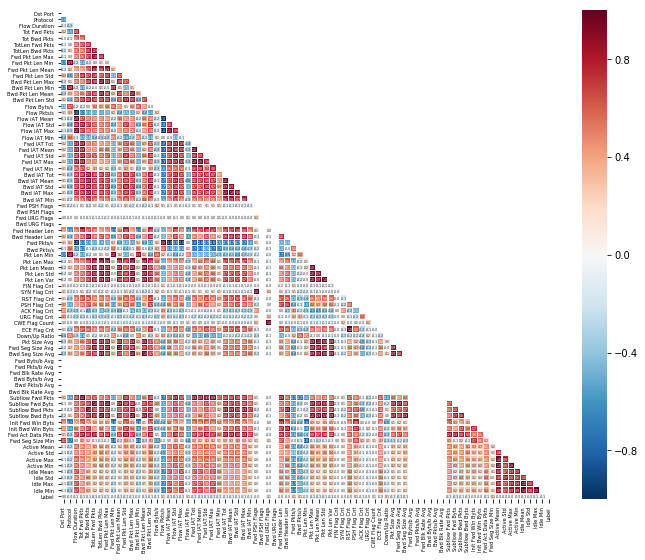

In [34]:
Infilteration_Clean_Numeric = Infilteration_Clean.apply(pd.to_numeric)
# Compute the correlation matrix
corr = Infilteration_Clean_Numeric.corr('spearman')
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, xticklabels=True, yticklabels=True, annot=True, fmt='.1f', cmap='RdBu_r', vmin=-1, vmax=1, linewidths=0.1, annot_kws={"size": 3})
plt.xticks(fontsize=5)
plt.yticks(fontsize=5)
plt.savefig('D:\Github\Intrusion Detection (TADA)\Figures\\SpearmanCorrelation(Infilteration).png', format='png', dpi=1200, bbox_inches='tight')
plt.show()

In [12]:
Infilteration_Clean = Infilteration1[~Infilteration1.index.isin(Infilteration_permanent.index)]

In [21]:
Infilteration_Clean.iloc[  19014 , : ]

Dst Port                     443
Protocol                       6
Flow Duration          115794439
Tot Fwd Pkts                  21
Tot Bwd Pkts                  20
TotLen Fwd Pkts              805
TotLen Bwd Pkts             6888
Fwd Pkt Len Max              440
Fwd Pkt Len Min                0
Fwd Pkt Len Mean     38.33333333
Fwd Pkt Len Std      104.4984848
Bwd Pkt Len Max             1460
Bwd Pkt Len Min                0
Bwd Pkt Len Mean           344.4
Bwd Pkt Len Std      569.7159403
Flow Byts/s           66.4366965
Flow Pkts/s          0.354075726
Flow IAT Mean        2894860.975
Flow IAT Std         4510500.947
Flow IAT Max            10000000
Flow IAT Min                   1
Fwd IAT Tot            116000000
Fwd IAT Mean          5789721.95
Fwd IAT Std          4937773.874
Fwd IAT Max             10000000
Fwd IAT Min                   14
Bwd IAT Tot            110000000
Bwd IAT Mean         5815588.579
Bwd IAT Std          5080280.838
Bwd IAT Max             10000000
Bwd IAT Mi

In [67]:
NewBot[~NewBot.applymap(np.isreal).all(1)]

Empty DataFrame
Columns: [Dst Port, Protocol, Flow Duration, Tot Fwd Pkts, Tot Bwd Pkts, TotLen Fwd Pkts, TotLen Bwd Pkts, Fwd Pkt Len Max, Fwd Pkt Len Min, Fwd Pkt Len Mean, Fwd Pkt Len Std, Bwd Pkt Len Max, Bwd Pkt Len Min, Bwd Pkt Len Mean, Bwd Pkt Len Std, Flow Byts/s, Flow Pkts/s, Flow IAT Mean, Flow IAT Std, Flow IAT Max, Flow IAT Min, Fwd IAT Tot, Fwd IAT Mean, Fwd IAT Std, Fwd IAT Max, Fwd IAT Min, Bwd IAT Tot, Bwd IAT Mean, Bwd IAT Std, Bwd IAT Max, Bwd IAT Min, Fwd PSH Flags, Bwd PSH Flags, Fwd URG Flags, Bwd URG Flags, Fwd Header Len, Bwd Header Len, Fwd Pkts/s, Bwd Pkts/s, Pkt Len Min, Pkt Len Max, Pkt Len Mean, Pkt Len Std, Pkt Len Var, FIN Flag Cnt, SYN Flag Cnt, RST Flag Cnt, PSH Flag Cnt, ACK Flag Cnt, URG Flag Cnt, CWE Flag Count, ECE Flag Cnt, Down/Up Ratio, Pkt Size Avg, Fwd Seg Size Avg, Bwd Seg Size Avg, Fwd Byts/b Avg, Fwd Pkts/b Avg, Fwd Blk Rate Avg, Bwd Byts/b Avg, Bwd Pkts/b Avg, Bwd Blk Rate Avg, Subflow Fwd Pkts, Subflow Fwd Byts, Subflow Bwd Pkts, Subflow Bwd Byts, Init Fwd Win Byts, Init Bwd Win Byts, Fwd Act Data Pkts, Fwd Seg Size Min, Active Mean, Active Std, Active Max, Active Min, Idle Mean, Idle Std, Idle Max, Idle Min, Label]
Index: []

[0 rows x 79 columns]